In [8]:
import os
import numpy as np
import numpy.ma as ma
import numpy.testing as npt
import diff_classifier.msd as msd
import diff_classifier.features as ft
import diff_classifier.heatmaps as hm

In [2]:
prefix = 'test'
msd_file = 'msd_{}.csv'.format(prefix)
ft_file = 'features_{}.csv'.format(prefix)

dataf = msd.random_traj_dataset(nparts=30, ndist=(1, 1), seed=3)
msds = msd.all_msds2(dataf, frames=100)
msds.to_csv(msd_file)
feat = ft.calculate_features(msds)
feat.to_csv(ft_file)
dataset = feat.drop(['frames', 'Track_ID'], axis=1)

In [ ]:
hm.plot_particles_in_frame(prefix, x_range=100, y_range=20, upload=False)

In [ ]:
assert os.path.isfile('in_frame_{}.png'.format(prefix))

In [ ]:
hm.plot_heatmap(prefix, resolution=400, rows=1, cols=2, figsize=(6,5), upload=False)
assert os.path.isfile('hm_asymmetry1_{}.png'.format(prefix))

In [ ]:
hm.plot_scatterplot(prefix, resolution=400, rows=1, cols=1, dotsize=120, upload=False)
assert os.path.isfile('scatter_asymmetry1_{}.png'.format(prefix))

In [ ]:
hm.plot_trajectories(prefix, resolution=520, rows=1, cols=1, upload=False)
assert os.path.isfile('traj_{}.png'.format(prefix))

In [ ]:
hm.plot_histogram(prefix, fps=1, umppx=1, frames=100, frame_interval=5, frame_range=5, y_range=10, upload=False)

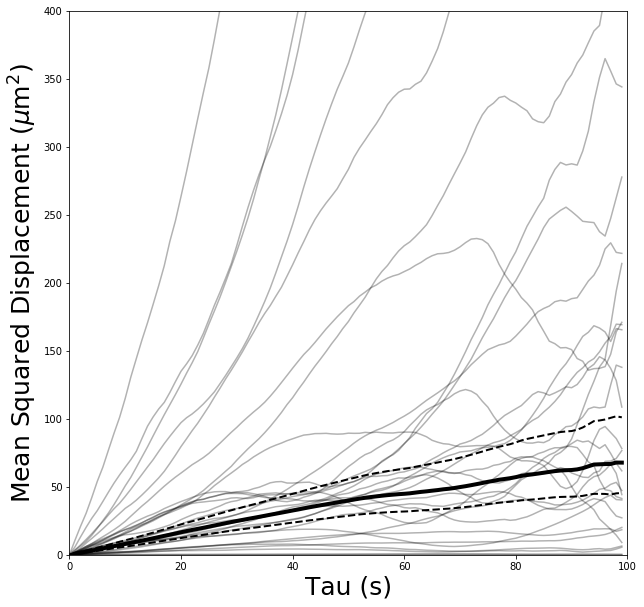

In [3]:
geomean, gSEM = hm.plot_individual_msds(prefix, umppx=1, fps=1, y_range=400, alpha=0.3, upload=False)

In [6]:
npt.assert_equal(332.8, np.round(np.sum(geomean), 1))

In [7]:
np.sum(gSEM)

33.110810095092837

In [ ]:
merged_ft = pd.read_csv('features_{}.csv'.format(prefix))
string = feature
leveler = merged_ft[string]
t_min = vmin
t_max = vmax
ires = resolution

# Building points and color schemes
# ----------
zs = ma.masked_invalid(merged_ft[string])
zs = ma.masked_where(zs <= t_min, zs)
zs = ma.masked_where(zs >= t_max, zs)
to_mask = ma.getmask(zs)
zs = ma.compressed(zs)

xs = ma.compressed(ma.masked_where(to_mask, merged_ft['X'].astype(int)))
ys = ma.compressed(ma.masked_where(to_mask, merged_ft['Y'].astype(int)))
points = np.zeros((xs.shape[0], 2))
points[:, 0] = xs
points[:, 1] = ys
vor = Voronoi(points)

# Plot
# ----------
fig = plt.figure(figsize=figsize, dpi=dpi)
regions, vertices = voronoi_finite_polygons_2d(vor)

In [12]:
from scipy.spatial import Voronoi

prefix = 'test'
msd_file = 'msd_{}.csv'.format(prefix)
ft_file = 'features_{}.csv'.format(prefix)

dataf = msd.random_traj_dataset(nparts=30, ndist=(1, 1), seed=3)
msds = msd.all_msds2(dataf, frames=100)
msds.to_csv(msd_file)
feat = ft.calculate_features(msds)
feat.to_csv(ft_file)

xs = feat['X'].astype(int)
ys = feat['Y'].astype(int)
points = np.zeros((xs.shape[0], 2))
points[:, 0] = xs
points[:, 1] = ys

vor = Voronoi(points)
regions, vertices = hm.voronoi_finite_polygons_2d(vor)

In [13]:
regions

[[46, 20, 5, 3, 6, 45],
 [38, 24, 23, 13, 35],
 [43, 23, 13, 41],
 [47, 7, 10, 12, 48],
 [28, 6, 3, 2, 27],
 [12, 10, 9, 8, 11],
 [0, 50, 49],
 [34, 15, 14, 33],
 [52, 51, 16, 31, 30],
 [16, 54, 53, 25, 26],
 [38, 24, 21, 1, 11, 8, 37],
 [40, 32, 7, 10, 9, 39],
 [46, 42, 41, 43, 44, 45],
 [2, 55, 56, 30, 27],
 [31, 16, 26, 22, 29],
 [46, 20, 18, 17, 19, 42],
 [14, 58, 57, 17, 19, 15],
 [42, 19, 15, 34, 36, 35, 13, 41],
 [39, 9, 8, 37],
 [40, 36, 35, 38, 37, 39],
 [44, 22, 26, 25, 21, 24, 23, 43],
 [11, 1, 0, 60, 59, 12],
 [31, 29, 28, 27, 30],
 [20, 5, 4, 18],
 [21, 25, 62, 61, 0, 1],
 [63, 2, 3, 5, 4, 64],
 [66, 65, 4, 18, 17],
 [45, 6, 28, 29, 22, 44],
 [68, 14, 33, 32, 7, 67],
 [40, 32, 33, 34, 36]]

In [16]:
np.mean(vertices)

212.27093489830978